<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Utilities" data-toc-modified-id="Utilities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utilities</a></span></li><li><span><a href="#Learning-rate-figure" data-toc-modified-id="Learning-rate-figure-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Learning rate figure</a></span><ul class="toc-item"><li><span><a href="#Mouse-steering-wheel" data-toc-modified-id="Mouse-steering-wheel-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mouse steering wheel</a></span></li><li><span><a href="#Mouse-single-whisker" data-toc-modified-id="Mouse-single-whisker-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mouse single whisker</a></span></li><li><span><a href="#Mouse-labyrinth" data-toc-modified-id="Mouse-labyrinth-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mouse labyrinth</a></span></li><li><span><a href="#Monkey-center-out-reach" data-toc-modified-id="Monkey-center-out-reach-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Monkey center-out reach</a></span></li><li><span><a href="#Child-word-learning" data-toc-modified-id="Child-word-learning-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Child word learning</a></span></li><li><span><a href="#Rat-motor-sequence" data-toc-modified-id="Rat-motor-sequence-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Rat motor sequence</a></span></li><li><span><a href="#Human-golf" data-toc-modified-id="Human-golf-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Human golf</a></span></li><li><span><a href="#Learning-rate-figure" data-toc-modified-id="Learning-rate-figure-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Learning rate figure</a></span></li></ul></li><li><span><a href="#Sparse-vs-dense-codes-for-associative-learning" data-toc-modified-id="Sparse-vs-dense-codes-for-associative-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sparse vs dense codes for associative learning</a></span><ul class="toc-item"><li><span><a href="#Sparse-code-case" data-toc-modified-id="Sparse-code-case-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sparse code case</a></span></li><li><span><a href="#Dense-code-case" data-toc-modified-id="Dense-code-case-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dense code case</a></span></li></ul></li></ul></div>

# Utilities

In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

from MM_Plot_Utils import plot, hist

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Entropy
def En(p):
    '''
    Returns entropy of distribution [p,1-p]
    '''
    return (-p*np.log(p)-(1-p)*np.log(1-p))/np.log(2)

In [3]:
# K-L distance
def KL_dist(p,q):
    '''
    returns KL-distance between actual distribution p 
    and reference distribution q.
    '''
    p=np.maximum(p,1e-12)
    q=np.maximum(q,1e-12)
    return np.sum(p*np.log(p/q))/np.log(2)


# Learning rate figure

## Mouse steering wheel
Burgess, C.P., Lak, A., Steinmetz, N.A., Zatka-Haas, P., Bai Reddy, C., Jacobs, E.A.K., Linden, J.F., Paton, J.J., Ranson, A., Schröder, S., et al. (2017). High-Yield Methods for Accurate Two-Alternative Visual Psychophysics in Head-Fixed Mice. Cell Reports 20, 2513–2524. https://doi.org/10.1016/j.celrep.2017.08.047.


In [4]:
# Mouse steering wheel: Amount learned to perform 83% correct on 2AFC task (2x2)
2*(1+(0.83*np.log(0.83)+0.17*np.log(0.17))/np.log(2))

0.684590442511561

Plot performance by our measure vs trials.
Figure from Burgess 2017:

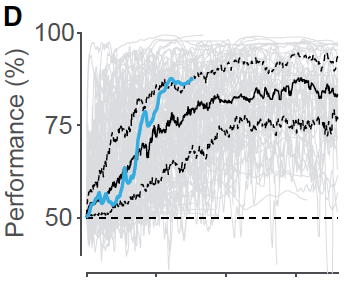
Time units are 5000 trials

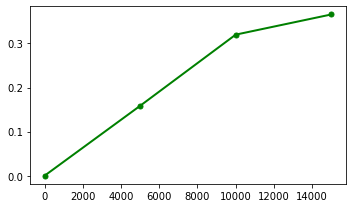

In [5]:
# data = (0,0.5),(5000,0.73),(10000,0.82),(15000,0.84)
t=[0,5000,10000,15000]
p=[0.5,0.73,0.82,0.84]
h=[1-En(x) for x in p]
plot(t,h,fmts=['go-']);

In [6]:
h[2]

0.31992295427172

For the first 10,000 trials the learning rate is a steady 0.32/10000 = 3.2e-5 bits/trial. Then it levels off.

## Mouse single whisker
Guo, Z.V., Li, N., Huber, D., Ophir, E., Gutnisky, D., Ting, J.T., Feng, G., and Svoboda, K. (2014). Flow of Cortical Activity Underlying a Tactile Decision in Mice. Neuron 81, 179–194. https://doi.org/10.1016/j.neuron.2013.10.020.

In [7]:
# Mouse whisker: Amount learned to perform 70% correct on 2AFC task (2x2)
2*(1+(0.7*np.log(0.7)+0.3*np.log(0.3))/np.log(2))

0.2374182015386146

## Mouse labyrinth
Rosenberg, M., Zhang, T., Perona, P., and Meister, M. (2021). Mice in a labyrinth exhibit rapid learning, sudden insight, and efficient exploration. ELife 10, e66175. https://doi.org/10.7554/eLife.66175.

In [8]:
# Mouse labyrinth: Amount learned to navigate to water port by direct path
1+5*np.log(3)/np.log(2)

8.924812503605782

## Monkey center-out reach
Berger, M., Calapai, A., Stephan, V., Niessing, M., Burchardt, L., Gail, A., and Treue, S. (2018). Standardized automated training of rhesus monkeys for neuroscience research in their housing environment. Journal of Neurophysiology 119, 796–807. https://doi.org/10.1152/jn.00614.2017.

In [9]:
# Monkey center-out: 80% correct on a 8x8 task
def h_8(p):
    return 8*(3+(p*np.log(p)+7*((1-p)/7)*np.log((1-p)/7))/np.log(2))
h_8(0.8)

13.732807365608934

## Child word learning

In [10]:
# child word learning, one of 26 words
np.log(26)/np.log(2)

4.700439718141093

## Rat motor sequence
Kawai, R., Markman, T., Poddar, R., Ko, R., Fantana, A.L., Dhawale, A.K., Kampff, A.R., and Olveczky, B.P. (2015). Motor cortex is required for learning but not for executing a motor skill. Neuron 86, 800–812. https://doi.org/10.1016/j.neuron.2015.03.024.

KL_dist(p,q) =  0.7152931870683851
KL_dist(q,p) =  0.5483215177071795


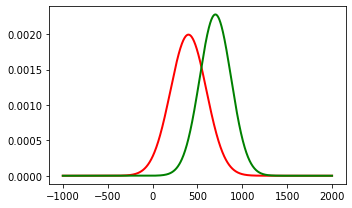

In [11]:
# rat motor sequence: KL distance between gaussians
def gauss(x,mean,sd):
    return 1/np.sqrt(2*np.pi)/sd*np.exp(-(x-mean)**2/2/sd**2)
x=np.linspace(-1000,2000,1000)
p_mean=700
p_sd=0.5*p_mean
p=gauss(x,400,0.5*400)
q=gauss(x,700,0.25*700)
plot(x,[p,q]);
print('KL_dist(p,q) = ',KL_dist(p,q))
print('KL_dist(q,p) = ',KL_dist(q,p))

## Human golf
Precision of shots from the fairway is ~5% for top golfers. 
Reference: James, N., and Rees, G.D. (2008). Approach Shot Accuracy as a Performance Indicator for US PGA Tour Golf Professionals. International Journal of Sports Science & Coaching 3, 145–160.


In [12]:
# Precision of a golf stroke in bits, assuming precision is 5% of distance from target, and 2.5% of max distance
-np.log(0.025**2)/np.log(2)

10.643856189774725

In [13]:
# 100 shots a day for 5 years
365 * 5 * 100

182500

In [14]:
# learning rate in golf, bits/trial
-np.log(0.025**2)/np.log(2)/(365 * 5 * 100)

5.8322499669998494e-05

## Learning rate figure

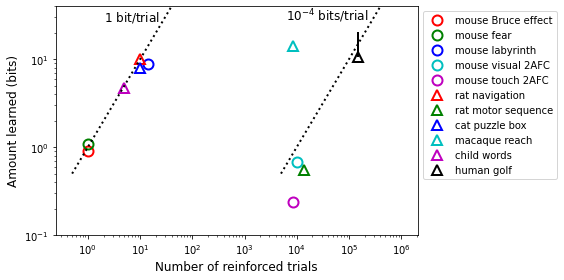

In [15]:
# Learning rate figure
data = [
    ['mouse Bruce effect',1,0.9], # label, trials, bits learned
    ['mouse fear',1,1.1],
    ['mouse labyrinth',14,8.9],
    ['mouse visual 2AFC',10000,0.68],
    ['mouse touch 2AFC',8400,0.24],
    ['rat navigation',10,10],
    ['rat motor sequence',13700,0.55],
    ['cat puzzle box',10,8],
    ['macaque reach',8500,14],
    ['child words',5,4.7],
    ['human golf',150000,10.7],
]

X=[[d[1]] for d in data]+[[5e-1,1e2]]+[[5e3,1e6]]
Y=[[d[2]] for d in data]+[[5e-1,1e2]]+[[5e-1,1e2]]
ax=plot(X,Y,
        yscale='log',
        xscale='log',
        fmts=['ro','go','bo','co','mo','r^','g^','b^','c^','m^','k^','k:','k:'],
        figsize=(6,4),
        markersize=10,
        fillstyle='none',
        markeredgewidth=2,
        loc='upper left',
        xlabel=r'Number of reinforced trials',
        ylabel=r'Amount learned (bits)',
        ylim=[1e-1,4e1]
)
ax.legend([d[0] for d in data],bbox_to_anchor=(1.0, 1.0));
ax.annotate(r'$1$ bit/trial ',(2.5e1,2.5e1),ha='right',va='bottom',fontsize=12);
ax.annotate(r'$10^{-4}$ bits/trial ',(2.5e5,2.5e1),ha='right',va='bottom',fontsize=12);
ax.arrow(data[10][1],data[10][2],0,10,linewidth=2);
plt.savefig('Learning_Rate.pdf',bbox_inches='tight')

# Sparse vs dense codes for associative learning

Say there are $n$ units with activity $s_i$ representing stimuli and $n$ units with activity $a_j$ representing actions. 

All-to-all connections $C_{ij}$.

For simplicity, say there are $n$ stimulus action pairs $({\bf{s}}^{(k)},{\bf{a}}^{(k)})$ to be associated.

## Sparse code case

$s_i^{(k)} = \delta_{ik}$ and $a_j^{(k)} = \delta_{jk}$

Learning: $C_{ij} = \sum_k s_j^{(k)} a_i^{(k)}$. Watch order of indices!

Recall: ${\bf{b}}^{(k)} = {\bf{C}} {\bf{s}}^{(k)}$

Evaluation: compare ${\bf{b}}^{(k)}$ to ${\bf{a}}^{(k)}$ for all $k$.

## Dense code case
Now stimuli are represented by patterns of $m$ active units, chosen at random. Enforce that no two stimulus patterns are the same. Same for actions.

$s_i^{(k)} = S_{ik}$ and $a_j^{(k)} = A_{jk}$

${\bf{S}}$ and ${\bf{A}}$ each have $m$ 1's in every column.

Learning: $C_{ij} = \sum_k S_{jk} A_{ik}$. Watch order of indices!

Recall: ${\bf{b}}^{(k)} = {\bf{C}} {\bf{s}}^{(k)}$

Evaluation: compare each recalled ${\bf{b}}^{(k)}$ to the various action vectors ${\bf{a}}^{(j)}$. 

What is a measure of "correct" readout? 
Use the dot product between recall vector and correct action vector.

Calculate the recall matrix 

\begin{align}
R_{kj}&={\bf{b}}^{(k)} \cdot {\bf{a}}^{(j)} \\
&= \sum_i B_{ik} A_{ij}
\end{align}

So given ${\bf{S}}$ and ${\bf{A}}$, we get

${\bf{C}} = {\bf{A}} \cdot {\bf{S}}^\top$

${\bf{B}} = {\bf{C}} \cdot {\bf{S}} = {\bf{A}} \cdot {\bf{S}}^\top \cdot {\bf{S}}$

${\bf{R}} = {\bf{B}}^\top \cdot {\bf{A}} = {\bf{S}}^\top \cdot {\bf{S}} \cdot {\bf{A}}^\top \cdot {\bf{A}}$

Under the assumptions, ${\bf{S}}^\top \cdot {\bf{S}}$ and ${\bf{A}}^\top \cdot {\bf{A}}$ have the same statistical properties. 

Say ${\bf{X}} = {\bf{S}}^\top \cdot {\bf{S}}$ is the correlation matrix across stimuli.

The diagonal: $X_{ii} = m$.

The off-diagonals: $\left< X_{ij} \right> = $ ???

Can think harder about this: Find an analytical epression for the expected overlap between two combinations of $m$ out of $n$ things. For now just do it numerically.


In [16]:
def Assoc(n,k,m):
    '''
    Simulate associative learning of k stimulus-action pairs.
    Each stimulus and action is represented by m active units among n.
    Plots the recall matrix from stimuli (rows) to actions (columns).
    Prints the fraction of stimuli for which the correct action had the
    largest recall.
    '''
    def Unique(n,k,m):
        '''
        make n x k array
        each column has m ones and n-m zeros
        all columns are different
        '''
        l=[1,]*m+[0,]*(n-m) # list with m ones and n-m zeros
        S=[] # list of column vectors
        while len(S)<k: # need k vectors, all different, each with m ones
            x=random.sample(l,n) # random vector with m ones
            if x not in S: # if not yet in the list
                S+=[x] # add it to the list
        return np.array(S).T # put vectors in columns of S
    
    import random
    random.seed(1)
    S=Unique(n,k,m) # m-hot representation of stimuli
    A=Unique(n,k,m) # m-hot representation of actions
    R=S.T.dot(S).dot(A.T.dot(A)) # recall matrix
    plt.imshow(R);
    plt.xticks([])
    plt.yticks([])
    print('Fraction correct: ',np.sum((np.argmax(R,axis=0)==np.arange(k))*1)/k)

Fraction correct:  1.0


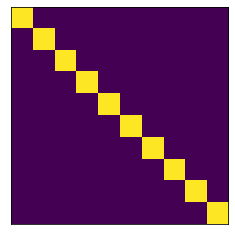

In [17]:
Assoc(10,10,1)
plt.savefig('Assoc_10_10_1.pdf',bbox_inches='tight')

For $m=1$ recall is perfect, as expected.

Fraction correct:  0.6


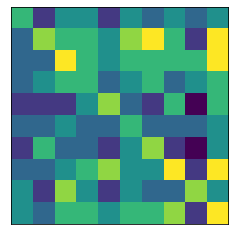

In [18]:
Assoc(10,10,2)

For $m=2$ recall is already lousy, lots of confusion opportunities.

Fraction correct:  0.5


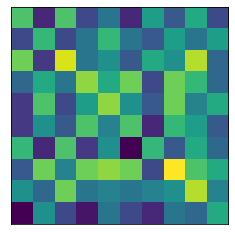

In [19]:
Assoc(10,10,3)
plt.savefig('Assoc_10_10_3.pdf',bbox_inches='tight')

For $m=3$ recall is even messier.

If have a larger neural population, recall improves, even if the same 30% fraction active.

Fraction correct:  1.0


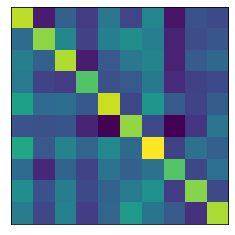

In [20]:
Assoc(100,10,30)

Fraction correct:  1.0


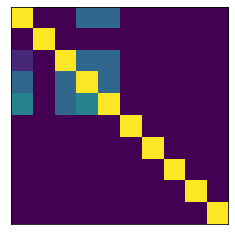

In [21]:
Assoc(100,10,3)